## DS102 Group 5: O'Customer, Why Art Thou Going?
### A study on understanding and predicting customer churn

#### Team members:
1. Lim Ern Khee Grace
2. Melvin Tjandradjaja
3. Priscilla Teo Jia En
4. Venecia Ng Shu Eng
5. Wong Hiu Man


### Part 1: Introduction

#### Background
In 2016, IMDA (Infocomm Media Development Authority) awarded the first Mobile Virtual Network Operator (MVNO) license to Circles.Life. This was the start of an upheaval in the telecommunications landscape, which, for years, have been monopolised by 3 major telecommunications company in Singapore - Singtel, Starhub, and M1. In the years since, more MVNOs have joined the fray;

Statistics provided by IMDA shows that there were 8.4M mobile subscribers in December 2020, a growth of only 2.6% from 5 years ago (8.2M in December 2015); However, competition in the industry has outpaced the marginal growth in number of subscribers - today, there is an estimated 11 telcos in Singapore (including MVNOs), all vying for a piece of the pie.

In today's competitive operating environment, customer churn has become more important than ever. Therefore, it is paramount that telcos have a thorough understanding of the profiles of their consumers, in order to devise strategies to keep the consumer with the company.


#### Problem Statement
Our team has been approaced by Telco X, a full-fledged mobile operator in Singapore. Telco X has faced significant customer churn in the last 12 months and is seeking to understand the factors behind customer attrition. 

Our project aims to investigate the relationship between the profile of the customer (i.e. demographic, tenure of the customer with Telco X, types of services subscribed with Telco X, any mandatory service period contracted with Telco X, monthly charges) and churn rate, to understand the factors which are significant in determining customer attrition.


#### Hypothesis
- Consumers who have more services bundled with their plans are less likely to change their mobile service provider due to hassle of having to look for alternative providers who are also providing the same suite of services (i.e. consumers who have multiple lines signed on with Telco X, or subscription to Streaming TV or Streaming Movies) 
- Consumers experiencing mobile network pain points are more likely to change their mobile service provider (i.e. customers who are not subscribed to online security/online backup/tech support services - perhaps have to troubleshoot their problems alone)
- Terms of contract: Consumers who are not on a long-term contract with Telco X (i.e. month-to-month contract vs 1-year or 2-years subscription) will have a higher churn rate  (*assumption that consumers who are signed on 1/2 years subscription will have to pay a fee for early termination of contract)


#### Dataset Evaluation
Our dataset was downloaded from Kaggle. Link to dataset is found below:

Source: [Telco Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn) 

The dataset comprises a sample of 7043 customers and 20 predictor variables. The latter is displayed in the table below:

| Attribute | Description |
| :- | :- |
| customerID | A unique ID that identifies each customer. |
| gender | The customer’s gender: Male, Female. |
| SeniorCitizen | (0/1) 0 denotes non-senior citizen. 1 denotes senior citizen. Is a senior customer 65 and above? 
| Partner | (Yes, No) Is the customer married? |
| Dependents | (Yes/No) Does the customer live with any dependents (e.g. children, parents, grandparents) |
| tenure | Total number of months that the customer has been with the company. |
| PhoneService | (Yes/No) Does the customer subscribe to home phone service with the company? |
| MultipleLines | (Yes/No) Does the customer subscribe to multiple telephone lines with the company? |
| InternetService | (No/DSL/Fiber Optic/Cable) Does the customer subscribe to Internet service with the company? |
| OnlineSecurity | (Yes/No) Does the customer subscribe to an additional online security service provided by the company? |
| OnlineBackup | (Yes/No) Does the customer subscribe to an additional online backup service provided by the company? |
| DeviceProtection | (Yes/No) Does the customer subscribe to an additional device proptection plan for their Internet equipment provided by the company? |
| TechSupport | (Yes/No) Does the customer subscribe to an additional technical support plan from the company with reduced wait times? |
| StreamingTV | (Yes/No) Does the customer use their Internet service to stream television programing from a third party provider <br>(Note: the company does not charge an additional fee for this service)</br> |
| StreamingMovies | (Yes/No) Does the customer use  their Internet service to stream movies from a third party provider? <br>(Note: the company does not charge an additional fee for this service)</br> |
| Contract | Customer’s current contract type: Month-to-Month, One Year, Two Year. |
| PaperlessBilling | (Yes/No) Has the customer chosen paperless billing? |
| PaymentMethod | (Bank Withdrawal/Credit Card/Mailed Check) How does the customer pay their bill? |
| MonthlyCharges | Customer’s current total monthly charge for all their services from the company. |
| TotalCharges | Customer’s total charges, calculated to the end of the quarter. |

The following is the response variable, displayed in the table below:

| Response | Description |
| :- | :- |
| Churn | Yes = the customer left the company during the quarter. <br>No = the customer remained with the company during the quarter.</br> |


### Part 2: Data Cleaning and Transformation

Before we begin our analysis into Telco X's customers dataset, we will need to clean and transform the raw data provided.

#### Objective 1

- Import all the necessary Python libraries
- Read the relevant csv file and generate a pandas dataframe
- Check if the dataset has null values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_palette('vlag_r')
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold
from sklearn import metrics


churn_df = pd.read_csv('telco_customer_churn.csv')

print(churn_df.info())
print(churn_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Observation

After looking into the information of the data frame, we determine that there are no null values.

#### Objective 2
To look at the number of unique values in the dataset's columns.

In [2]:
col_list = []
value_list = []

for col in churn_df.columns:
    col_list.append(col)
    value_list.append(len(churn_df[col].unique()))

check1 = pd.DataFrame(list(zip(col_list, value_list)), columns=['Column Name','Unique Value'])
display(check1)

,Column Name,Unique Value
0,customerID,7043
1,gender,2
2,SeniorCitizen,2
3,Partner,2
4,Dependents,2
5,tenure,73
6,PhoneService,2
7,MultipleLines,3
8,InternetService,3
9,OnlineSecurity,3


#### Observation
- The column `customerID` consists of all unique values. This is likely because each customer is tagged to a unique customerID for identification purposes in Telco X's database. As such, it is unlikely that the column will be able to generate any meaningful analysis.

- Exception can be made for the tenure column as it contains the number of years the 
customer has been using the company's service and might prove useful for the analysis.

- Exception can also be made on the MonthlyCharges and TotalCharges column as they contain monetary values that might be useful for monetary based analysis.

#### Objective 3
To exclude the customerID column on the basis of being disqualified due to a huge number of unique values

In [3]:
churn_df = churn_df.drop(columns='customerID')

#### Objective 4
Changing column names for consistency on the naming convention and ease for further coding

In [4]:
modified_columns = {'SeniorCitizen': 'senior_citizen', 
                    'Partner': 'partner', 
                    'Dependents': 'dependents',
                   'PhoneService': 'phone_service',
                   'MultipleLines': 'multiple_lines',
                   'InternetService': 'internet_service',
                   'OnlineSecurity': 'online_security',
                   'OnlineBackup': 'online_backup',
                   'DeviceProtection': 'device_protection',
                   'TechSupport': 'tech_support',
                   'StreamingTV':'streaming_tv',
                   'StreamingMovies':'streaming_movies',
                   'Contract':'contract',
                   'PaperlessBilling':'paperless_billing',
                   'PaymentMethod':'payment_method',
                   'MonthlyCharges':'monthly_charges',
                   'TotalCharges':'total_charges',
                   'Churn':'churn'}

churn_df = churn_df.rename(columns=modified_columns)

churn_df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Objective 5
To inspect the values of the dataset's columns for data modifications

In [5]:
# Displays unique values in a dataframe:

unique_columns_list1 = []
unique_value_list1 = []

for col in churn_df.columns:
    unique_columns_list1.append(col)
    unique_value_list1.append(str(churn_df[col].unique()))

unique_values_table1 = pd.DataFrame(list(zip(unique_columns_list1, unique_value_list1)), columns=['Column Name','Unique Values'])
display(unique_values_table1)

,Column Name,Unique Values
0,gender,['Female' 'Male']
1,senior_citizen,[0 1]
2,partner,['Yes' 'No']
3,dependents,['No' 'Yes']
4,tenure,[ 1 34 2 45 8 22 10 28 62 13 16 58 49 25 69 ...
5,phone_service,['No' 'Yes']
6,multiple_lines,['No phone service' 'No' 'Yes']
7,internet_service,['DSL' 'Fiber optic' 'No']
8,online_security,['No' 'Yes' 'No internet service']
9,online_backup,['Yes' 'No' 'No internet service']


#### Objective 6
To modify the data in the dataset for the analysis phase

##### Step 1
After inspecting the categorical values on each of the columns in objective 5, the following modifications will be considered 
for ease of observation:

- The value `No phone service` in `multiple_lines` column will be changed to `Not applicable` (In this case, the customer is not using the phone service)

- The value 'No internet service' in online_security, online_backup, device_protection, tech_support, streaming_tv, streaming_movies column will be changed to 'Not applicable' (In this case, the customer is not using the internet service)

- The value 'Month-to-month' in the contract column will be changed to 'Monthly' (In this case the customer is paying on the monthly basis)

- The value 'Bank transfer (automatic)' and 'Credit card (automatic)' in the payment method will be changed to 'Bank transfer' and 'Credit card'

- The values in the total_charges column will be changed from string to float


In [6]:
def val_modif(str_val):
    condition = str_val == 'Yes' or str_val == 'No' or str_val == 'One year' or str_val == 'Two year' or str_val == 'Electronic check' or str_val == 'Mailed check' 
    
    if str_val == 'No phone service' or str_val == 'No internet service':
        return 'Not applicable'
    elif str_val == 'Month-to-month':
        return 'Monthly'
    elif str_val == 'Bank transfer (automatic)':
        return 'Bank transfer'
    elif str_val == 'Credit card (automatic)':
        return 'Credit card'
    elif condition:
        return str_val

targeted_cols = ['multiple_lines',
                 'online_security', 
                 'online_backup', 
                 'device_protection', 
                 'tech_support', 
                 'streaming_tv',
                 'streaming_movies',
                 'contract',
                 'payment_method']

for value in targeted_cols:
    churn_df[value] = churn_df[value].apply(val_modif)

churn_df['total_charges'] = churn_df.total_charges.replace(' ',0).apply(float)

##### Step 2
Since both DSL and Fiber Optic value are indicators of internet service utilizaton, then DSL and Fiber Optic 
value will be categorized as Yes.

No internet service value will be categorized as No.

In [7]:
churn_df['connection_type'] = churn_df.internet_service

def val_modif2(str_val):
    if str_val == 'DSL' or str_val == 'Fiber optic':
        return 'Yes'
    else: 
        return 'No'

churn_df['internet_service'] = churn_df.internet_service.apply(val_modif2)


##### Step 3
The connection_type column was added to the dataframe in step 2 to identify the type of internet connection the customer is using.

The 'No' values will be changed to 'Not applicable' to better describe a non-existing internet connection for
users who don't use the internet service.

In [8]:
def val_modif3(str_val):
    if str_val == 'DSL' or str_val == 'Fiber optic':
        return str_val
    else:
        return 'Not applicable'
    
churn_df['connection_type'] = churn_df.connection_type.apply(val_modif3)


##### Step 4
We will assume that the tenure values are in months and will modify the tenure column name to `tenure_months`.

This is to indicate the number of months the customer has been with Telco X.

In [9]:
churn_df = churn_df.rename(columns={'tenure':'tenure_months'})

##### Step 5
A quick inspection to ensure that modifications and conversions were done correctly.

In [10]:
unique_columns_list3 = []
unique_value_list3 = []

for col in churn_df.columns:
    unique_columns_list3.append(col)
    unique_value_list3.append(str(churn_df[col].unique()))

unique_values_table3 = pd.DataFrame(list(zip(unique_columns_list3, unique_value_list3)), columns=['Column Name','Unique Values'])
display(unique_values_table3)


,Column Name,Unique Values
0,gender,['Female' 'Male']
1,senior_citizen,[0 1]
2,partner,['Yes' 'No']
3,dependents,['No' 'Yes']
4,tenure_months,[ 1 34 2 45 8 22 10 28 62 13 16 58 49 25 69 ...
5,phone_service,['No' 'Yes']
6,multiple_lines,['Not applicable' 'No' 'Yes']
7,internet_service,['Yes' 'No']
8,online_security,['No' 'Yes' 'Not applicable']
9,online_backup,['Yes' 'No' 'Not applicable']


##### Step 6:

An inspection of unique values in Step 5 shows that there are customers whose tenure periods are indicated as '0'.

To investigate further, we decided to isolate those customers who have 0 month tenure from those who have at least 1 month tenure and find out the proportion of these customers.


In [11]:
condition1 = churn_df.tenure_months == 0
condition2 = churn_df.tenure_months >= 1

zero_ten_df = churn_df[condition1]
non_zero_ten_df = churn_df[condition2]

display(zero_ten_df.head())

zero_ten_percent = round((len(zero_ten_df)/len(churn_df)*100),2)
non_zero_ten_percent = round((len(non_zero_ten_df)/len(churn_df)*100),2)

ten_prop_df = pd.DataFrame(data={'zero_tenure':zero_ten_percent, 
                                 'non_zero_tenure':non_zero_ten_percent},index=['percentage'])

display(ten_prop_df.head())



,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn,connection_type
488,Female,0,Yes,Yes,0,No,Not applicable,Yes,Yes,No,...,Yes,Yes,No,Two year,Yes,Bank transfer,52.55,0.0,No,DSL
753,Male,0,No,Yes,0,Yes,No,No,Not applicable,Not applicable,...,Not applicable,Not applicable,Not applicable,Two year,No,Mailed check,20.25,0.0,No,Not applicable
936,Female,0,Yes,Yes,0,Yes,No,Yes,Yes,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No,DSL
1082,Male,0,Yes,Yes,0,Yes,Yes,No,Not applicable,Not applicable,...,Not applicable,Not applicable,Not applicable,Two year,No,Mailed check,25.75,0.0,No,Not applicable
1340,Female,0,Yes,Yes,0,No,Not applicable,Yes,Yes,Yes,...,Yes,Yes,No,Two year,No,Credit card,56.05,0.0,No,DSL


,zero_tenure,non_zero_tenure
percentage,0.16,99.84


##### Observation for step 6
A quick look into the first 5 rows of the 0 month tenure dataframe indicated that these customers have service subscriptions.  

It can be assumed that these are new customers whose services had not been activated 
and they have yet to experience the service bundle included in the subscription.

Furthermore, they only account for 0.16 percent of the entire customer population.

The focus should be on the customers whose tenure is at least 1 month.

These customers would already have reasons to remain with the company or move to the competitors.

Therefore, it would make sense to exclude the customers with zero tenure from further observation.


##### Step 7
We have decided to further investigate the tenure_months, monthly_charges, and total_charges column by looking into their correlations.

In [12]:
service_charge_df = non_zero_ten_df[['tenure_months','monthly_charges','total_charges']]

service_charge_corr = service_charge_df.corr()

service_charge_matrix = service_charge_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

service_charge_matrix

,tenure_months,monthly_charges,total_charges
tenure_months,1.00,0.25,0.83
monthly_charges,0.25,1.00,0.65
total_charges,0.83,0.65,1.00


##### Observation for Step 7 
The matrix below shows the following heavy positive correlations:

- Total charges and tenure months
- Total charges and monthly charges

The assumption here is that the values of the total charges are the products of the tenure_months and monthly_charges. 


##### Step 8
Since it is assumed that the values in the total_charges column are influenced by the values in the
monthly_charges and the monthly_charges column is crucial for monetary based observation, then the total_charges
column can be dropped.

In [13]:
non_zero_ten_df = non_zero_ten_df.drop(columns='total_charges')

### Part 3: Exploratory Data Analysis

As the data cleaning and transformation task have already been completed, we are ready to proceed with our data analysis.

We will be dividing our analysis into the following categories:

- Customer Demography
- Service Utilization
- Monetary and Tenure
- Modelling Interaction

For the customer demography analysis, we will be determining which departed customers demography should be prioritized and what are the possible factors associated to their departures.

For the service utilization analysis, we are looking to divide the departed customers into a group based on their service utilization and determine the possible driving factors for their decision to continue their service subscriptions with Telco X's competitors.

For the monetary and tenure analysis, we want to investigate if customers' departures have something to do with the monthly charge incurred for the service(s) rendered and is correlated to their tenure periods. 

For the modelling interaction analysis, we are looking to investigate the correlations of variables other than the tenure periods with the customers churn variables.


#### Overall Churn Rate Overview

##### Objective 1
We would like to obtain an overall insight on the proportion of the departed and remaining customers.

##### Data Preparation
We created a data frame contain the proportion of remaining and departed customers.

##### Visualization
Bar chart plot will be used to visualize the proportion of the churn numbers.

The churn rate data frame will be supplemented to show the numerical values of churn rate. 

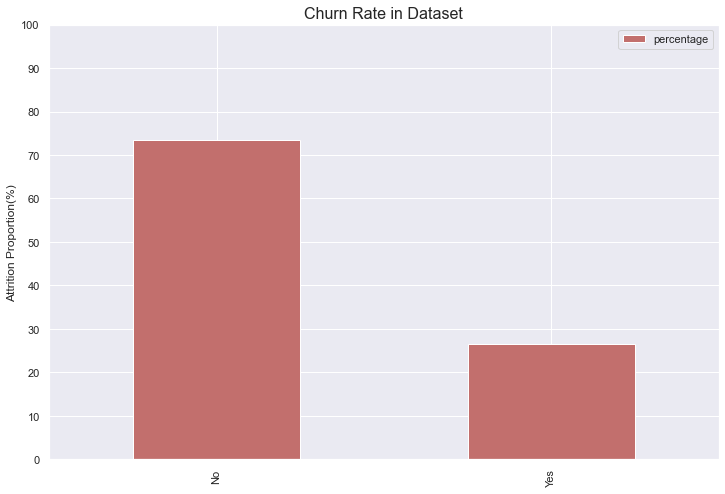

,churn,percentage
No,5163,73.4
Yes,1869,26.6


In [14]:
churnrate_df = pd.DataFrame(non_zero_ten_df.churn.value_counts())
churnrate_df['percentage'] = round(churnrate_df.churn.apply(lambda x:x/non_zero_ten_df.churn.shape[0]*100),1)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
churnrate_df.plot(kind='bar', y='percentage', ax=ax1)
ax1.set_title("Churn Rate in Dataset", fontsize=16)
ax1.set_ylabel("Attrition Proportion(%)", fontsize=12)
ax1.set_yticks(np.arange(0, 110, 10))
plt.show()

display(churnrate_df)

##### Observation
The proportion of the customer attrition rate is in favor of the customers who remained with Telco X.

##### Analysis & Conclusion
Although the minority are the customers who decided to depart Telco X, we would like to investigate further into the factors contributing to the customers decision to switch over to the competitor.

<br>
With more than a quarter of customers left Telco X, we would like to predict the churn rate based on the data we have gathered.
</font>

#### Demographic Based Analysis

##### Objective 1
As a start, we would like to gain insights on the proportion of the departed and remaining customers based on demography.

##### Visualization
Bar chart plots will be used to visualize the proportion of the churn numbers based on the demography.

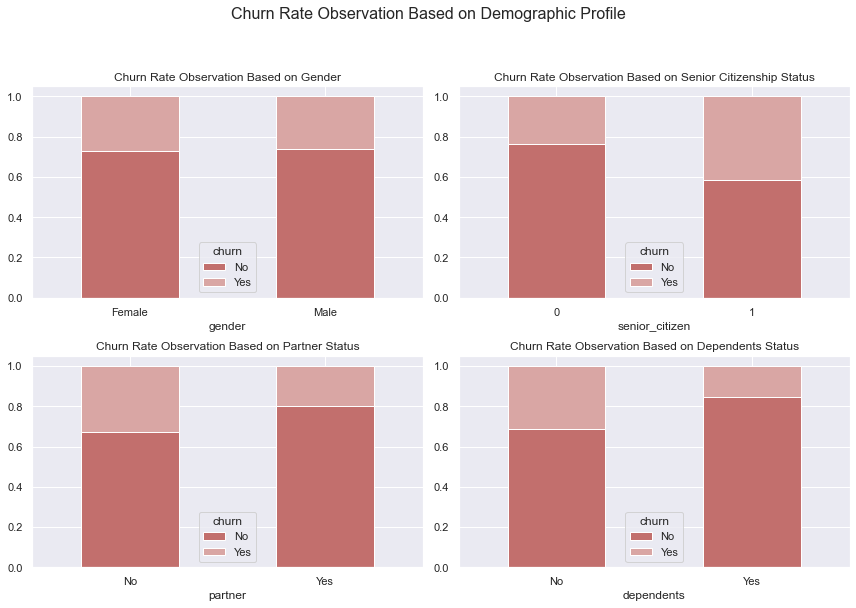

In [15]:
fig1 = plt.figure(figsize=(12,8))

ax1 = fig1.add_subplot(2,2,1)
ax2 = fig1.add_subplot(2,2,2)
ax3 = fig1.add_subplot(2,2,3)
ax4 = fig1.add_subplot(2,2,4)


table = pd.crosstab(non_zero_ten_df.gender, non_zero_ten_df.churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', 
                                                   stacked=True,
                                                   ax=ax1,
                                                   title='Churn Rate Observation Based on Gender'
                                                  )

table = pd.crosstab(non_zero_ten_df.senior_citizen, non_zero_ten_df.churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', 
                                                   stacked=True,
                                                   ax=ax2,
                                                   title='Churn Rate Observation Based on Senior Citizenship Status'
                                                  )

table = pd.crosstab(non_zero_ten_df.partner, non_zero_ten_df.churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', 
                                                   stacked=True,
                                                   ax=ax3,
                                                   title='Churn Rate Observation Based on Partner Status'
                                                  )

table = pd.crosstab(non_zero_ten_df.dependents, non_zero_ten_df.churn)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', 
                                                   stacked=True,
                                                   ax=ax4,
                                                   title='Churn Rate Observation Based on Dependents Status'
                                                  )

ax1.set_xticklabels(labels=['Female','Male'], rotation=0)
ax2.set_xticklabels(labels=['0','1'], rotation=0)
ax3.set_xticklabels(labels=['No','Yes'], rotation=0)
ax4.set_xticklabels(labels=['No','Yes'], rotation=0)
plt.suptitle('Churn Rate Observation Based on Demographic Profile', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


##### Observations
- The difference in churn rate based on gender is insignificant.
- The churn rate for customers who are in the `senior citizens` group is higher than those who are not. This could be because people of older age are not as well-versed in technology, they may not feel a real need for services such as online security, device protection, etc. Hence, they are likely to leave if the number of services used is lesser than people who are of a younger age group.
- Customers `without a partner` are more likely to change telco companies than those with a partner. This could be due to lesser commitments and a larger degree of freedom of choice.
- Customers `without dependents` are more likely to change telco companies than those with dependents. Similarly, this could be due to lesser commitments and a larger degree of freedom of choice, especially when the dependents are of a younger age group, who use heavily streaming tv and movies services, they are less agreeable to changes in telco, dreading any possible lifestyle interruptions.

##### Analysis & Conclusions
Based on our observations above, we have decided to focus on the churn rate for the following groups:
- Customers who are senior citizens
- Customers who are single
- Customers who are without dependents

These groups have been shown to have higher churn rate in our observations and, therefore, must be prioritized.


##### Objective 2
We want to determine which departed customer group accounts for the majority and needs to be prioritized.

##### Data Preparation
We will create 3 data frames that will contain variables belonging to the following churned customer groups:
- Senior citizens
- Without a partner
- Without dependents

We will calculate the proportion of each of customer groups and we store the results in the proportion dataframe.

In [16]:
departed_df = non_zero_ten_df[non_zero_ten_df.churn == 'Yes']

condition1 = departed_df.senior_citizen == 1
condition2 = departed_df.partner == 'No'
condition3 = departed_df.dependents == 'No'

conditions =[condition1, condition2, condition3]

dfs = []
for condition in conditions:
    df = departed_df[condition]
    dfs.append(df)
    
props = []
for df in dfs:
    prop = round(len(df)/len(departed_df)*100,2)
    props.append(prop)

props_df = pd.DataFrame()
props_df['customer_group'] = ['senior_citizens','no_partner','no_dependents']
props_df['percentage'] = props

props_df


,customer_group,percentage
0,senior_citizens,25.47
1,no_partner,64.21
2,no_dependents,82.56


##### Observations
The proportion dataframe shows that customers without dependents make up for the majority of the departed customer groups.

##### Analysis & Conclusion
Since customers who are without dependents make the majority of the departed customer group, we have decided to proceed with a more in-depth investigation into this category.

##### Objective 3
We are looking to ascertain if payment methods is a factor in the departures of customers who have no dependents.

##### Data  Preparation
In preparing the data, we have isolated the no depend customer data from the rest of the populace and group them by payment method.

Once the grouping is done, we calculated the proportion of each of the payment method category and store the results in the proportion dataframe.

##### Visualizations
Pie chart is used to visualize the proportion for the payment method category.

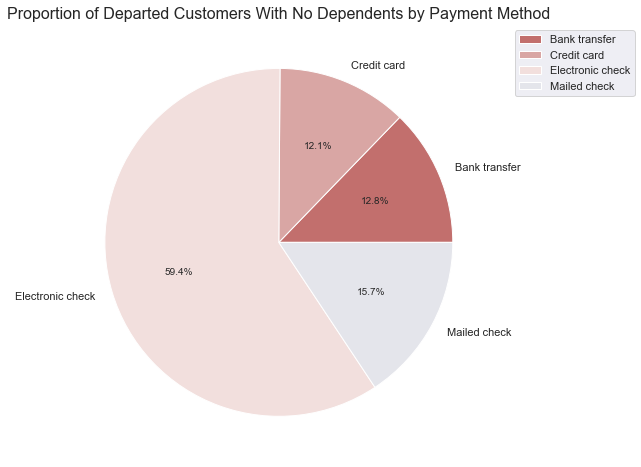

In [17]:
no_dependents_df = dfs[2]
payment_method_prop = round(no_dependents_df.groupby('payment_method').size()/len(no_dependents_df)*100,2)

pm_prop_df = pd.DataFrame(payment_method_prop)

pm_prop_df = pm_prop_df.rename(columns={0:''})

pm_prop_df.plot.pie(subplots=True, figsize=(8, 8), autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.03, 1))
plt.title('Proportion of Departed Customers With No Dependents by Payment Method', fontsize=16)
plt.show()

##### Observations
Electronic check seems to be the most utilized payment methods by the customers whereas credit card and bank transfer are the least used.

##### Analysis & Conclusion
With the emergence of mobile banking application for smart phones, more consumers in general have come to experience high degree of convenience in conducting online transactions using bank transfer and their credit cards.

These online transactions include payments for phone and internet services.

Since bank transfer and credit card are the least popular payment method among these customers under this circumstance, we recommend that an investigation on the online payment platform be initiated to iron out more information that can be used for further analysis as a proactive measure in ensuring that the company can avoid customers' departures to the competitors due to an inconvenient payment process.



#### Service Utilization Analysis

##### Objective 1
We want to begin this analysis by determining which Telco X customer category should be highly prioritized for the company's retention program.

##### Data Preparation
This analysis will focus on the customers who have stayed at least 1 month and left Telco X for a competitor.

During the data cleaning and transformation phase, we have already isolated customers with at least 1 month tenure from the ones who are just joining the company by creating a non zero month dataframe and zero month dataframe.

We will isolate customers who left from those who remained in a new dataframe.

The new dataframe will be filtered and divided into the following 3 categories:
 
- Customers who use phone only service
- Customers who use internet only  service
- Customers who use phone and internet service

We will calculate the proportion for each of the 3 categories

We will create a new dataframe that serve as container for the proportion values.

The dataframe containing the proportion values in turn will be used for visualizations.

##### Visualizations

Pie chart plot will be employed to visualize the proportion of the 3 categories.


##### Data Preparation

This analysis will focus on the customers who have stayed at Telco X for at least 1 month.

During the data cleaning and transformation phase, we have already isolated customers with at least 1 month tenure from those who left within a month by creating a non zero month dataframe and zero month dataframe.

We will isolate customers who left from those who remained in a new dataframe.

The new dataframe will be filtered and divided into the following 3 categories:
 
- Customers who use phone only service
- Customers who use internet only  service
- Customers who use phone and internet service

We will calculate the proportion for each of the 3 categories which will be stored in a new dataframe which will be used for visualizations.
</font>

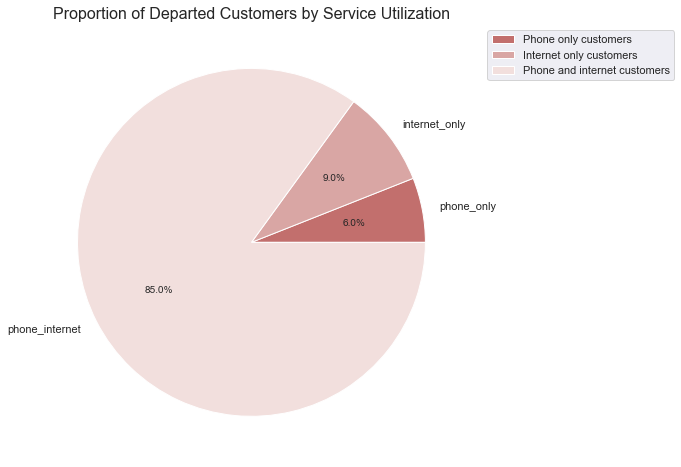

In [19]:
condition1 = non_zero_ten_df.churn == 'Yes'

departed_cust_df = non_zero_ten_df[condition1]

condition2 = (departed_cust_df.phone_service == 'Yes') & (departed_cust_df.internet_service == 'No')
condition3 = (departed_cust_df.phone_service == 'No') & (departed_cust_df.internet_service == 'Yes')
condition4 = (departed_cust_df.phone_service == 'Yes') & (departed_cust_df.internet_service == 'Yes')

cond_list = [condition2, condition3, condition4]
df_list = []

for condition in cond_list:
    df = departed_cust_df[condition]
    df_list.append(df)

prop_list=[]

for df in df_list:
    prop = round(len(df)/len(departed_cust_df)*100)
    prop_list.append(prop)

index_list = ['phone_only','internet_only','phone_internet']     
prop_df = pd.DataFrame(index=index_list, columns=[' '])
prop_df[' '] = prop_list

prop_df.plot.pie(subplots=True, figsize=(8, 8), autopct='%1.1f%%')
plt.legend(['Phone only customers', 'Internet only customers', 'Phone and internet customers'],
           bbox_to_anchor=(1.03, 1))
plt.title('Proportion of Departed Customers by Service Utilization', fontsize=16)
plt.show()


##### Observations
The majority of the customers who left are the ones who subscribe to phone and internet service.

##### Analysis & Conclusion
Even though we should recommend Telco X to prioritize building the customer retention program surrounding the phone and internet customer category, we felt that it is our obligation to be thorough and investigate the other 2 categories as well.


##### Objective 2
We would like to further investigate customers who are using phone service only.

##### Data Preparation
We have decided to split this category into the following 2 sub categories:
- customers using a single phone line
- customers using multiple phone lines

We will create two dataframes that will serve as containers for the split data and calculate the proportion for each of the sub categories.

The proportion values will be populated into a new dataframe that will be used for visualizations.

##### Visualizations
Pie chart plot will be used to visualize the proportion of the sub categories.


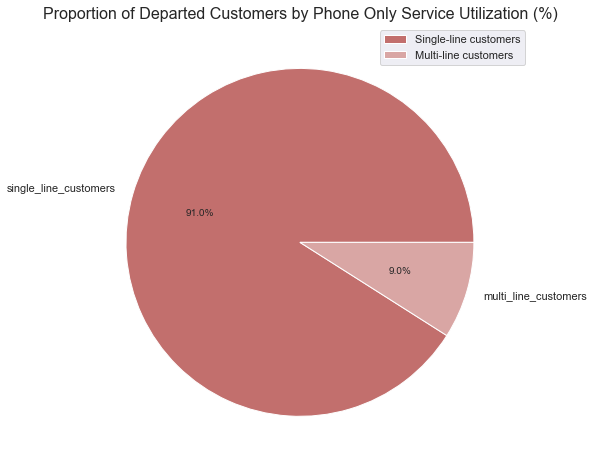

In [20]:
phone_cust_df = df_list[0]

condition5 = phone_cust_df.multiple_lines == 'No'
condition6 = phone_cust_df.multiple_lines == 'Yes'

single_line_df = phone_cust_df[condition5]
multi_line_df = phone_cust_df[condition6]

single_line_prop = round(len(single_line_df)/len(phone_cust_df)*100)
multi_line_prop = round(len(multi_line_df)/len(phone_cust_df)*100)

prop_df = pd.DataFrame({' ': [single_line_prop, multi_line_prop]},
                      index = ['single_line_customers', 'multi_line_customers'])


prop_df.plot.pie(subplots=True, figsize=(8, 8), legend = False, autopct='%1.1f%%')
plt.legend(['Single-line customers', 'Multi-line customers'],bbox_to_anchor=(1.03, 1))
plt.title('Proportion of Departed Customers by Phone Only Service Utilization (%)', fontsize=16)
plt.show()

##### Observations
The majority of the customers who left are the ones who utilize a single phone line service.

##### Analysis & Conclusion
The purpose of this observation is to see which sub category should be prioritized for Telco X's customer retention program. 

Since the majority of the departed customers in this category are the single phone line customers, they are the ones who should be prioritized. 

Furthermore, we will investigate further to identify possible driving factors of their departures. 


##### Observations
The majority of the customers who left are the ones who utilize a single phone line service.

##### Analysis & Conclusion
The purpose of this observation is to determine which sub category should be prioritized for Telco X's customer retention program. 

Since the majority of the departed customers in this category are the single phone line customers, Telco X should focus on this group of customers.

Futher investigation will be done to identify possible driving factors of their departures. 
</font>

##### Objective 3
We would like to identify possible factors that lead to single phone line customers' departures.

##### Data Preparation
We decided to focus our investigation on the customers' contract terms perspective.

For our data preparation task, we calculated the proportion for each of the 3 contract terms.
We created a dataframe to contain the contract terms proportion values which will be used for the visualizations.

##### Visualizations
Bar chart plot will be used to visualize the proportion of the contract terms along with the proportion data frame to display the numerical values. 

,contract_term,percentage
0,Monthly,91
1,One year,6
2,Two year,1


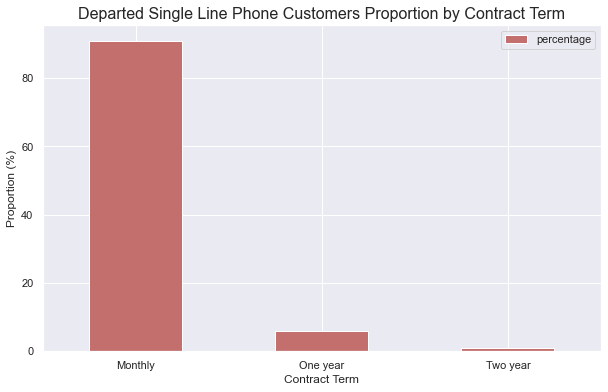

In [21]:
contract_prop = single_line_df.contract.value_counts()/len(single_line_df)*100

contract_prop_df = pd.DataFrame(contract_prop)

contract_prop_df.reset_index(inplace=True)
contract_prop_df.columns = ['contract_term','percentage']

contract_prop_df['percentage'] = contract_prop_df.percentage.apply(int)

display(contract_prop_df)

contract_prop_df.plot(kind='bar', x='contract_term', y='percentage',figsize=(10,6))
plt.title('Departed Single Line Phone Customers Proportion by Contract Term', fontsize=16)
plt.xlabel('Contract Term')
plt.ylabel('Proportion (%)')
plt.xticks(rotation='horizontal')
plt.show()


##### Observations
The majority of the departed single line customers are the ones who signed on for the monthly post paid term.

##### Analysis and Conclusion

This observation could be due to customers having lesser obligation to fulfil the entire contract timeframe and hence, more likely to leave for another telco.

If Telco X were to initiate a customer retention program for the phone only customers, perhaps it can start by reviewing the clauses of the monthly contract and identify which part of the service package the customers are not satisfied with.

Perhaps a survey on the customers' satisfactory level on the services rendered can be conducted to obtain the data required for further analysis to pinpoint which service terms need to be amended and improved.


##### Objective 4
We would like to identify possible factors that lead to Internet only customers' departures.

##### Data preparation
During objective 1 data preparation stage we have already created 3 dataframes for phone only, internet only, and phone and internet customers.  

We will be using the internet only customers dataframe and create new dataframes based on the internet services utilizations. 

Then we will calculate the proportion for each of the internet services utilizations and create a new dataframe to store the values.

This proportion data frame will be used for the visualizations.

##### Visualizations
Bar chart plot will be used to visualize the proportion of the service utilizations along with the proportion data frame to display the numerical values. 




,internet_services_used,percentage
5,streaming_movies,42
4,streaming_tv,38
1,online_backup,30
2,device_protection,29
0,online_security,17
3,tech_support,16


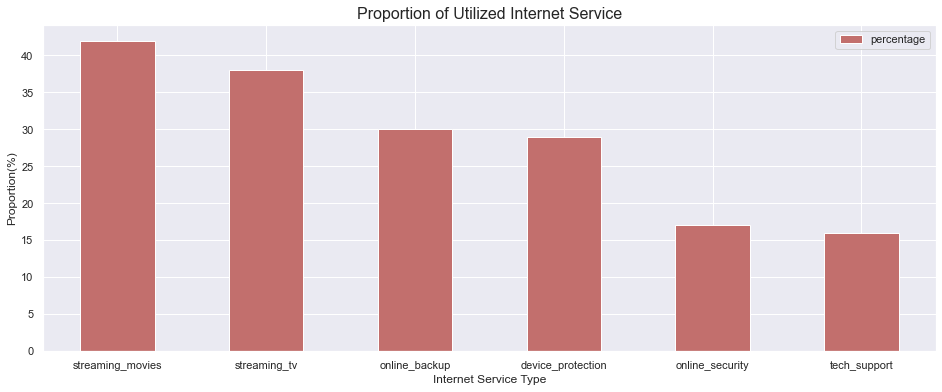

In [22]:
condition_list=[]
internet_df = df_list[1]
int_serv_list=['online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies']

for service in int_serv_list:
    condition = internet_df[service] == 'Yes'
    condition_list.append(condition)
    
int_df_list=[]

for condition in condition_list:
    dataframe = internet_df[condition]
    int_df_list.append(dataframe)

prop_list=[]
    
for df in int_df_list:
    prop = round(len(df)/len(internet_df) * 100)
    prop_list.append(prop)

internet_service_df = pd.DataFrame(columns=['internet_services_used', 'percentage'])

internet_service_df['internet_services_used'] = int_serv_list
internet_service_df['percentage'] = prop_list

df_sorted = internet_service_df.sort_values('percentage', ascending=False)

display(df_sorted)

df_sorted.plot(kind='bar',x='internet_services_used',y='percentage', figsize=(16,6))
plt.title('Proportion of Utilized Internet Service', fontsize=16)
plt.xlabel('Internet Service Type')
plt.ylabel('Proportion(%)')
plt.xticks(rotation='horizontal')
plt.show()

##### Observations
The Online security and technical support service seem to be the least popular among the 6 rendered Internet services.

##### Analysis & Conclusion
If Telco X were to initiate a customer retention program for internet only customers, it can start by investigating the online security and technical support packages provided to the customers.

Perhaps a review into the overall performance of the support team can be conducted to collate additional data for further analysis.


#### Monetary and Tenure Based Analysis

##### Objective 1
To determine how to use values in the monthly charge and tenure column for our analysis.

##### Visualization
Histogram plot will be used to visualize the distribution of the monthly charge and tenure values.

/Users/mtjandra77/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mtjandra77/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


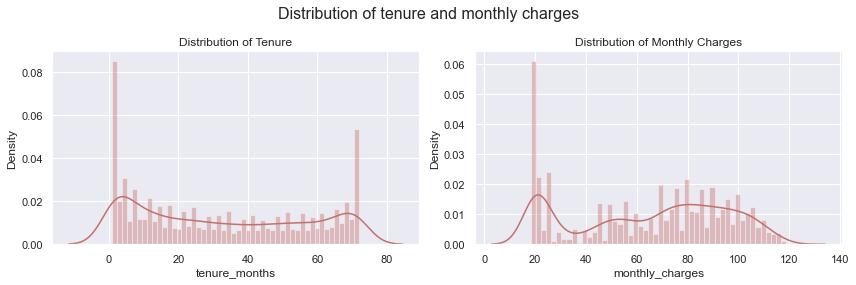

Number of monthly charge unique values: 1584
Number of tenure unique values: 72


In [23]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)


sns.distplot(non_zero_ten_df.tenure_months,
             kde=True,
             #norm_hist=False,
             bins=50,
             #color='darkblue',
             ax=ax1).set_title('Distribution of Tenure')

sns.distplot(non_zero_ten_df.monthly_charges,
             kde=True,
             #norm_hist=False,
             bins=50,
             #color='red',
             ax=ax2).set_title('Distribution of Monthly Charges')

plt.suptitle('Distribution of tenure and monthly charges', fontsize=16)
plt.tight_layout()
plt.show()


print('Number of monthly charge unique values: ' + str(len(non_zero_ten_df.monthly_charges.unique())))
print('Number of tenure unique values: ' + str(len(non_zero_ten_df.tenure_months.unique())))


##### Observation
There seem to be a huge distribution of the monthly charge and tenure values.

##### Analysis and Conclusion
As huge numbers of unique monthly charge and tenure values can represent a challenge for our analysis, we have decided to use the average values of both variables to proceed further. 


##### Objective 2

To determine if monthly charge and tenure period are correlated to customers decision in switching over to the competitors.

##### Data Preparation

We have decided to divide the Telco X customers into three categories.

- Customers who use phone service only
- Customers who use internet service only
- Customer who use phone and internet service

This will be done by creating 3 data frames based on the appropriate filtering for the categories.

##### Visualizations

Box plots will be employed to visualize the comparison of the average monthly charge between remaining and departed customers by categories.

The visualizations will be accompanied by the data frame that will represent the numerical values of the average monthly charge. 



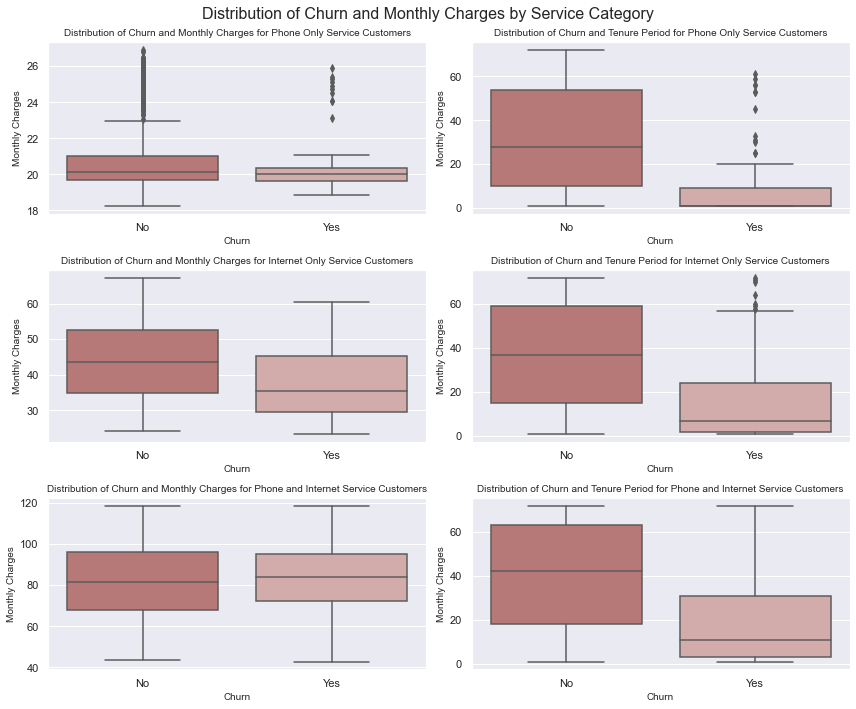

,departed_customers_avg_monthly_charge,remaining_customers_avg_monthly_charge
phone service only,20.37,21.13
internet service only,37.53,43.48
phone and internet service,82.25,81.52


,departed_customers_avg_tenure,remaining_customers_avg_tenure
phone service only,8.24,32.47
internet service only,15.84,37.16
phone and internet service,18.90,39.97


Average difference in tenure period between departed and remaining customers: 22 months


In [24]:
ph_only_cust = non_zero_ten_df[(non_zero_ten_df.phone_service == 'Yes') & 
                                  (non_zero_ten_df.internet_service == 'No')]

int_only_cust = non_zero_ten_df[(non_zero_ten_df.phone_service == 'No') & 
                                  (non_zero_ten_df.internet_service == 'Yes')]

ph_int_cust = non_zero_ten_df[(non_zero_ten_df.phone_service == 'Yes') & 
                                  (non_zero_ten_df.internet_service == 'Yes')]

fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)

boxplot1 = sns.boxplot(x='churn', y='monthly_charges', data=ph_only_cust, ax=ax1)
boxplot1.set_xlabel("Churn", fontsize=10)
boxplot1.set_ylabel("Monthly Charges", fontsize=10)
boxplot1.set_title('Distribution of Churn and Monthly Charges for Phone Only Service Customers', fontsize=10)

boxplot2 = sns.boxplot(x='churn', y='tenure_months', data=ph_only_cust, ax=ax2)
boxplot2.set_xlabel("Churn", fontsize=10)
boxplot2.set_ylabel("Monthly Charges", fontsize=10)
boxplot2.set_title('Distribution of Churn and Tenure Period for Phone Only Service Customers', fontsize=10)

boxplot3 = sns.boxplot(x='churn', y='monthly_charges', data=int_only_cust, ax=ax3)
boxplot3.set_xlabel("Churn", fontsize=10)
boxplot3.set_ylabel("Monthly Charges", fontsize=10)
boxplot3.set_title('Distribution of Churn and Monthly Charges for Internet Only Service Customers', fontsize=10)

boxplot4 = sns.boxplot(x='churn', y='tenure_months', data=int_only_cust, ax=ax4)
boxplot4.set_xlabel("Churn", fontsize=10)
boxplot4.set_ylabel("Monthly Charges", fontsize=10)
boxplot4.set_title('Distribution of Churn and Tenure Period for Internet Only Service Customers', fontsize=10)

boxplot5 = sns.boxplot(x='churn', y='monthly_charges', data=ph_int_cust, ax=ax5)
boxplot5.set_xlabel("Churn", fontsize=10)
boxplot5.set_ylabel("Monthly Charges", fontsize=10)
boxplot5.set_title('Distribution of Churn and Monthly Charges for Phone and Internet Service Customers', fontsize=10)

boxplot6 = sns.boxplot(x='churn', y='tenure_months', data=ph_int_cust, ax=ax6)
boxplot6.set_xlabel("Churn", fontsize=10)
boxplot6.set_ylabel("Monthly Charges", fontsize=10)
boxplot6.set_title('Distribution of Churn and Tenure Period for Phone and Internet Service Customers', fontsize=10)

plt.suptitle('Distribution of Churn and Monthly Charges by Service Category', fontsize=16)
plt.tight_layout()
plt.show()

mc_ph_yes_mean = round(ph_only_cust[ph_only_cust['churn'] == 'Yes'].monthly_charges.mean(),2)
mc_ph_no_mean = round(ph_only_cust[ph_only_cust['churn'] == 'No'].monthly_charges.mean(),2)

mc_int_yes_mean = round(int_only_cust[int_only_cust['churn'] == 'Yes'].monthly_charges.mean(),2)
mc_int_no_mean = round(int_only_cust[int_only_cust['churn'] == 'No'].monthly_charges.mean(),2)

mc_ph_int_yes_mean = round(ph_int_cust[ph_int_cust['churn'] == 'Yes'].monthly_charges.mean(),2)
mc_ph_int_no_mean = round(ph_int_cust[ph_int_cust['churn'] == 'No'].monthly_charges.mean(),2)

cust_cat_list=['phone service only', 'internet service only', 'phone and internet service']
mc_yes_mean_list=[mc_ph_yes_mean, mc_int_yes_mean, mc_ph_int_yes_mean]
mc_no_mean_list=[mc_ph_no_mean, mc_int_no_mean, mc_ph_int_no_mean]

mc_mean_df = pd.DataFrame(data={'departed_customers_avg_monthly_charge': mc_yes_mean_list,
                            'remaining_customers_avg_monthly_charge': mc_no_mean_list},index=cust_cat_list)

tn_ph_yes_mean = round(ph_only_cust[ph_only_cust['churn'] == 'Yes'].tenure_months.mean(),2)
tn_ph_no_mean = round(ph_only_cust[ph_only_cust['churn'] == 'No'].tenure_months.mean(),2)

tn_int_yes_mean = round(int_only_cust[int_only_cust['churn'] == 'Yes'].tenure_months.mean(),2)
tn_int_no_mean = round(int_only_cust[int_only_cust['churn'] == 'No'].tenure_months.mean(),2)

tn_ph_int_yes_mean = round(ph_int_cust[ph_int_cust['churn'] == 'Yes'].tenure_months.mean(),2)
tn_ph_int_no_mean = round(ph_int_cust[ph_int_cust['churn'] == 'No'].tenure_months.mean(),2)

tn_yes_mean_list=[tn_ph_yes_mean, tn_int_yes_mean, tn_ph_int_yes_mean]
tn_no_mean_list=[tn_ph_no_mean, tn_int_no_mean, tn_ph_int_no_mean]

tn_mean_df = pd.DataFrame(data={'departed_customers_avg_tenure': tn_yes_mean_list,
                            'remaining_customers_avg_tenure': tn_no_mean_list},index=cust_cat_list)

display(mc_mean_df)
display(tn_mean_df)

tn_mean_diff = tn_mean_df['remaining_customers_avg_tenure'].mean() - tn_mean_df['departed_customers_avg_tenure'].mean()

print('Average difference in tenure period between departed and remaining customers:', round(tn_mean_diff), 'months')

##### Observations
- The average monthly charges for phone or internet service only customer who remained with Telco X are higher than the ones who departed.
- The average monthly charges for phone and internet service customers who remained with Telco X are lower than the ones who left.
- The departed customers seemed to have stayed for a shorter period of time compared to those who remained.


##### Analysis & Conclusion
Based on the observations above, the customers who use phone or internet only service do not seem to consider price to be the driving force for their departure from Telco X since the ones who left are paying less than the ones who remained. 

As for the customers who use both services, it can be assumed that price is the driving force for their departure. 

On average, customers who left during the period was with Telco X for 22 months shorter than those who remained.

Under these circumstances, it can be concluded that there are correlations between the churn variable and both monthly charge and tenure period.  


#### Modelling Interactions Analysis 

##### Objective 1
Based on the conclusion that the churn variable is correlated to both monthly charge and tenure period, we have decided to investigate if there are interactions between other qualitative (i.e. categorical) variables and the churn decision variable. 

We will be exploring the following variables for our interaction investigation:
- Contract type 
- Phone Service
- Multiple lines
- Tech Support
- Internet Service
- Streaming TV
- Streaming Movies
- Online Security
- Online Backup
- Device Protection

##### VIsualizations
Interaction plots will be used to visualize the interactions where lines with different slopes in the chart indicates that interaction between churn and other variables exists.


In [25]:
from statsmodels.graphics.factorplots import interaction_plot

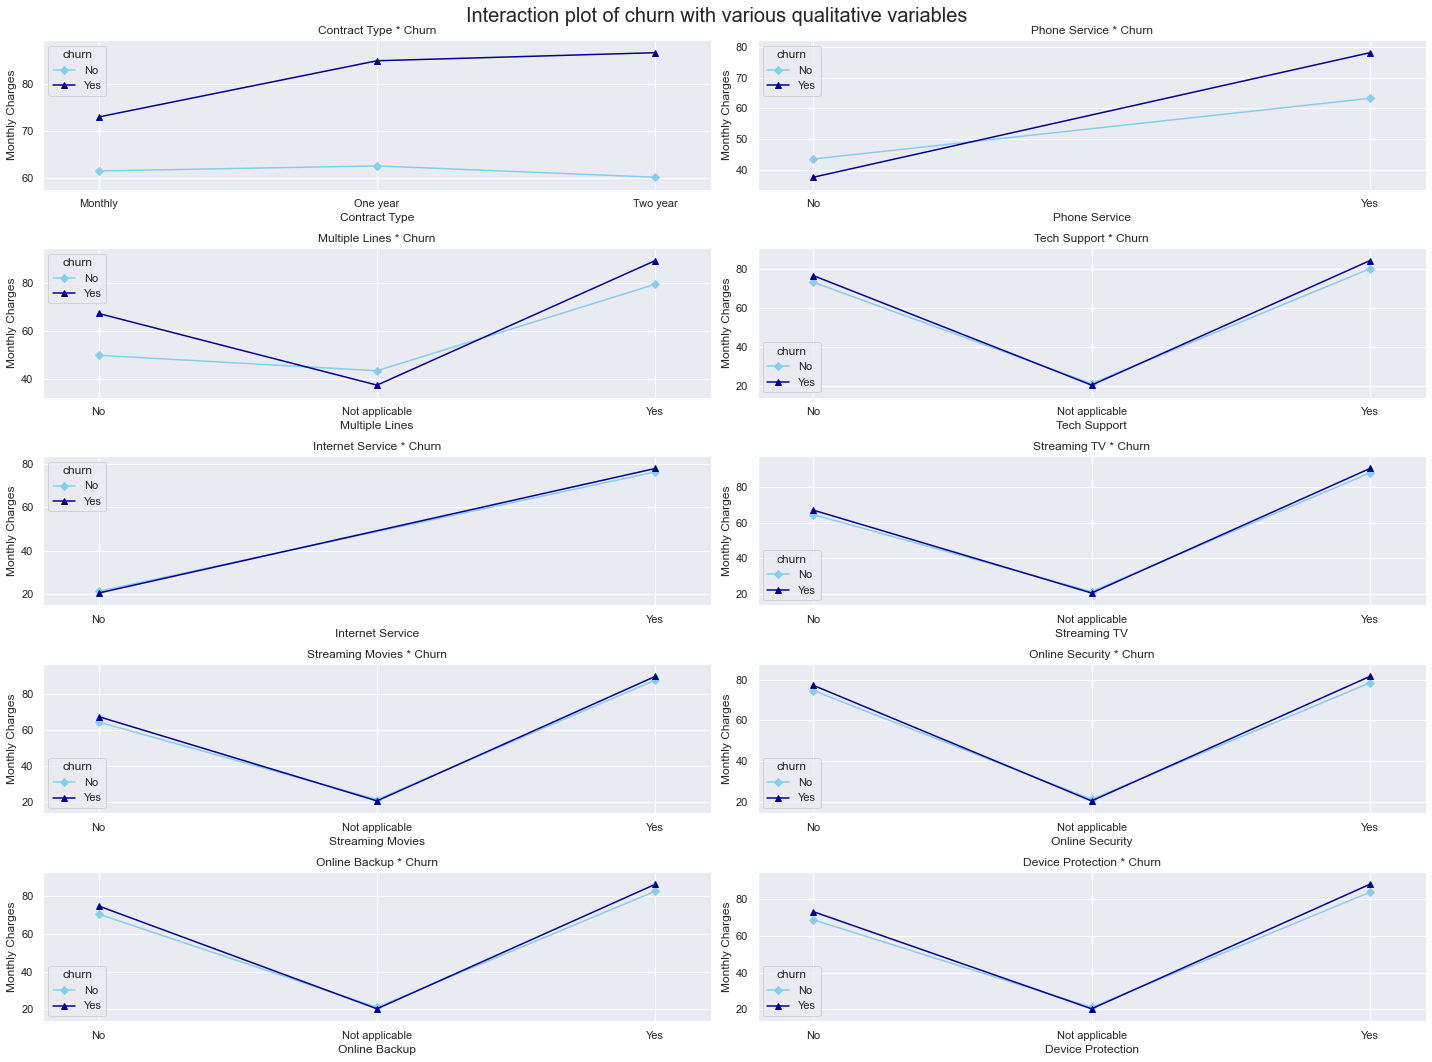

In [26]:
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(5,2,1)
ax2 = fig.add_subplot(5,2,2)
ax3 = fig.add_subplot(5,2,3)
ax4 = fig.add_subplot(5,2,4)
ax5 = fig.add_subplot(5,2,5)
ax6 = fig.add_subplot(5,2,6)
ax7 = fig.add_subplot(5,2,7)
ax8 = fig.add_subplot(5,2,8)
ax9 = fig.add_subplot(5,2,9)
ax10 = fig.add_subplot(5,2,10)

interaction_plot(x=non_zero_ten_df.contract, trace=non_zero_ten_df.churn, response=non_zero_ten_df.monthly_charges,
                colors=['skyblue','darkblue'], markers=['D','^'], ax=ax1)
ax1.set_ylabel("Monthly Charges")
ax1.set_xlabel("Contract Type")
ax1.set_title("Contract Type * Churn")


interaction_plot(x=non_zero_ten_df.phone_service, trace=non_zero_ten_df.churn, response=non_zero_ten_df.monthly_charges,
                colors=['skyblue','darkblue'], markers=['D','^'], ax=ax2)
ax2.set_ylabel("Monthly Charges")
ax2.set_xlabel("Phone Service")
ax2.set_title("Phone Service * Churn")

interaction_plot(x=non_zero_ten_df.multiple_lines, trace=non_zero_ten_df.churn, response=non_zero_ten_df.monthly_charges,
                colors=['skyblue','darkblue'], markers=['D','^'], ax=ax3)
ax3.set_ylabel("Monthly Charges")
ax3.set_xlabel("Multiple Lines")
ax3.set_title("Multiple Lines * Churn")

interaction_plot(x=non_zero_ten_df.tech_support, trace=non_zero_ten_df.churn, response=non_zero_ten_df.monthly_charges,
                colors=['skyblue','darkblue'], markers=['D','^'], ax=ax4)
ax4.set_ylabel("Monthly Charges")
ax4.set_xlabel("Tech Support")
ax4.set_title("Tech Support * Churn")

interaction_plot(x=non_zero_ten_df.internet_service, trace=non_zero_ten_df.churn, response=non_zero_ten_df.monthly_charges,
                colors=['skyblue','darkblue'], markers=['D','^'], ax=ax5)
ax5.set_ylabel("Monthly Charges")
ax5.set_xlabel("Internet Service")
ax5.set_title("Internet Service * Churn")

interaction_plot(x=non_zero_ten_df.streaming_tv, trace=non_zero_ten_df.churn, response=non_zero_ten_df.monthly_charges, 
                 colors=['skyblue','darkblue'], markers=['D','^'], ax=ax6)
ax6.set_ylabel("Monthly Charges")
ax6.set_xlabel("Streaming TV")
ax6.set_title("Streaming TV * Churn")

interaction_plot(x=non_zero_ten_df.streaming_movies, trace=non_zero_ten_df.churn, response=non_zero_ten_df.monthly_charges,
                colors=['skyblue','darkblue'], markers=['D','^'], ax=ax7)
ax7.set_ylabel("Monthly Charges")
ax7.set_xlabel("Streaming Movies")
ax7.set_title("Streaming Movies * Churn")

interaction_plot(x=non_zero_ten_df.online_security, trace=non_zero_ten_df.churn, response=non_zero_ten_df.monthly_charges,
                colors=['skyblue','darkblue'], markers=['D','^'], ax=ax8)
ax8.set_ylabel("Monthly Charges")
ax8.set_xlabel("Online Security")
ax8.set_title("Online Security * Churn")

interaction_plot(x=non_zero_ten_df.online_backup, trace=non_zero_ten_df.churn, response=non_zero_ten_df.monthly_charges,
                colors=['skyblue','darkblue'], markers=['D','^'], ax=ax9)
ax9.set_ylabel("Monthly Charges")
ax9.set_xlabel("Online Backup")
ax9.set_title("Online Backup * Churn")

interaction_plot(x=non_zero_ten_df.device_protection, trace=non_zero_ten_df.churn, response=non_zero_ten_df.monthly_charges,
                colors=['skyblue','darkblue'], markers=['D','^'], ax=ax10)
ax10.set_ylabel("Monthly Charges")
ax10.set_xlabel("Device Protection")
ax10.set_title("Device Protection * Churn")

plt.suptitle('Interaction plot of churn with various qualitative variables', fontsize=20)
plt.tight_layout()
plt.show()


##### Observations 

Note that interaction exist when the lines in the interaction plots are not parallel.

The 10 interaction plots above shows that interactions exist for 
- `Churn and contractual type variable`
- `Churn and phone service variable`

##### Analysis & Conclusion

Our observations confirm the existence of interaction effects. 

In order to determine whether the interaction effects are statistically significant or just white noises, hypothesis testing needs to be done. A Chi-Square test can be employed for the testing.


### Part 4: Prediction of Churn

In predicting customer churn, we will take the following approach:
1. Conversion of categorical variables to numerical variables, and standardisation of numerical variables to remove scaling effects.
2. Model Development - splitting of dataset to 75% training, and 25% testing
3. Model 1 - Logistic Regression and evaluation of model performance
4. Model 2 - Decision Tree and evaluation of model performance
5. Comparison of performance between Model 1 and Model 2

#### 1. Conversion of categorical variables and perform scaling
<u> Conversion of categorical variables to numerical variables </u>

To deploy a machine learning model, all input and output variables have to be converted to numerical form. As the original dataset contains many columns that are in categorical form, we utilised the one-hot encoding method to convert the categorical variables to numeric form (as these columns do not have a natural rank ordering).


To refresh our memories - display columns in `non_zero_ten_df` and shape of dataset

In [27]:
# Identify list of predictor variables

col_list_nz = []

for col in non_zero_ten_df:
    col_list_nz.append(col)
    
print (col_list_nz)
print("\nShape of original dataset: ", non_zero_ten_df.shape)

['gender', 'senior_citizen', 'partner', 'dependents', 'tenure_months', 'phone_service', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method', 'monthly_charges', 'churn', 'connection_type']

Shape of original dataset:  (7032, 20)


Next, convert `churn` column into a binary numerical classification.

In [28]:
non_zero_ten_df['churn'] = non_zero_ten_df['churn'].replace({"Yes": 1, "No": 0})
non_zero_ten_df.head()


,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,churn,connection_type
0,Female,0,Yes,No,1,No,Not applicable,Yes,No,Yes,No,No,No,No,Monthly,Yes,Electronic check,29.85,0,DSL
1,Male,0,No,No,34,Yes,No,Yes,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,0,DSL
2,Male,0,No,No,2,Yes,No,Yes,Yes,Yes,No,No,No,No,Monthly,Yes,Mailed check,53.85,1,DSL
3,Male,0,No,No,45,No,Not applicable,Yes,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,42.30,0,DSL
4,Female,0,No,No,2,Yes,No,Yes,No,No,No,No,No,No,Monthly,Yes,Electronic check,70.70,1,Fiber optic


Thereafter, convert all other columns into numerical classification using the one-hot encoding method. 

Note that the number of columns increased from 20 columns to 31 columns.

In [29]:
non_zero_ten_enc_df = pd.get_dummies(non_zero_ten_df, drop_first=True)
non_zero_ten_enc_df.head()


,senior_citizen,tenure_months,monthly_charges,churn,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_Not applicable,multiple_lines_Yes,...,streaming_movies_Not applicable,streaming_movies_Yes,contract_One year,contract_Two year,paperless_billing_Yes,payment_method_Credit card,payment_method_Electronic check,payment_method_Mailed check,connection_type_Fiber optic,connection_type_Not applicable
0,0,1,29.85,0,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
1,0,34,56.95,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0,2,53.85,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,45,42.30,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2,70.70,1,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0


In [30]:
# Append all numerical-coded predictor variables to a list

col_list_nz_enc = []

for col in non_zero_ten_enc_df:
    col_list_nz_enc.append(col)
    
print (col_list_nz_enc)
print("\nShape of converted dataset: ", non_zero_ten_enc_df.shape)


['senior_citizen', 'tenure_months', 'monthly_charges', 'churn', 'gender_Male', 'partner_Yes', 'dependents_Yes', 'phone_service_Yes', 'multiple_lines_Not applicable', 'multiple_lines_Yes', 'internet_service_Yes', 'online_security_Not applicable', 'online_security_Yes', 'online_backup_Not applicable', 'online_backup_Yes', 'device_protection_Not applicable', 'device_protection_Yes', 'tech_support_Not applicable', 'tech_support_Yes', 'streaming_tv_Not applicable', 'streaming_tv_Yes', 'streaming_movies_Not applicable', 'streaming_movies_Yes', 'contract_One year', 'contract_Two year', 'paperless_billing_Yes', 'payment_method_Credit card', 'payment_method_Electronic check', 'payment_method_Mailed check', 'connection_type_Fiber optic', 'connection_type_Not applicable']

Shape of converted dataset:  (7032, 31)


<u> Standardising all variables to remove scalar effect using MinMaxScalar </u>

In [31]:
scaler = MinMaxScaler(feature_range = (0,1))

for col in col_list_nz_enc:   
    non_zero_ten_enc_df[col] = non_zero_ten_enc_df[col].astype(float)
    non_zero_ten_enc_df[col] = scaler.fit_transform(non_zero_ten_enc_df[[col]])

non_zero_ten_enc_df.head()


,senior_citizen,tenure_months,monthly_charges,churn,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_Not applicable,multiple_lines_Yes,...,streaming_movies_Not applicable,streaming_movies_Yes,contract_One year,contract_Two year,paperless_billing_Yes,payment_method_Credit card,payment_method_Electronic check,payment_method_Mailed check,connection_type_Fiber optic,connection_type_Not applicable
0,0.0,0.000000,0.115423,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.464789,0.385075,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.014085,0.354229,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.619718,0.239303,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


#### 2. Model development

In [32]:
# Separate response variable (i.e. 'churn') from predictor variables

col_list_nz_enc_pred = []

for col in non_zero_ten_enc_df:
    if col != 'churn':
        col_list_nz_enc_pred.append(col)
    
print(col_list_nz_enc_pred)  


['senior_citizen', 'tenure_months', 'monthly_charges', 'gender_Male', 'partner_Yes', 'dependents_Yes', 'phone_service_Yes', 'multiple_lines_Not applicable', 'multiple_lines_Yes', 'internet_service_Yes', 'online_security_Not applicable', 'online_security_Yes', 'online_backup_Not applicable', 'online_backup_Yes', 'device_protection_Not applicable', 'device_protection_Yes', 'tech_support_Not applicable', 'tech_support_Yes', 'streaming_tv_Not applicable', 'streaming_tv_Yes', 'streaming_movies_Not applicable', 'streaming_movies_Yes', 'contract_One year', 'contract_Two year', 'paperless_billing_Yes', 'payment_method_Credit card', 'payment_method_Electronic check', 'payment_method_Mailed check', 'connection_type_Fiber optic', 'connection_type_Not applicable']


In [33]:
# Train-test split

X = non_zero_ten_enc_df[col_list_nz_enc_pred]
y = non_zero_ten_enc_df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 42)
train_test_split

print(X_train.shape)
print(X_test.shape)


(5274, 30)
(1758, 30)


#### 3. Model 1 - Logistic Regression

In [34]:
LogRegr = LogisticRegression()
results = LogRegr.fit(X_train, y_train)
y_pred = results.predict(X_test)


<u> Evaluation of Logistic Regression model using Accuracy Score </u>

In [35]:
acc_score_logr = round(metrics.accuracy_score(y_test, y_pred),4)

print("Accuracy score for Logistic Regression Model:", acc_score_logr)

Accuracy score for Logistic Regression Model: 0.7958


<u> Evaluation of Logistic Regression model using Confusion Matrix </u>

[[1159  141]
 [ 218  240]]


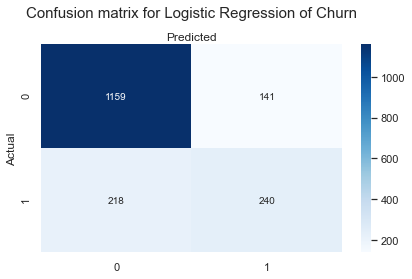

In [36]:
from sklearn import metrics
cnf_matrix_logr = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix_logr)

class_names = [0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_logr), annot=True, cmap=plt.cm.Blues, fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix for Logistic Regression of Churn', y=1.1, fontsize=15)
plt.ylabel('Actual')
plt.xlabel('Predicted');
plt.tight_layout()
plt.show()


In [37]:
TPR_logr = round(240/(240+141), 4)
TNR_logr = round(1159/(1159+218), 4)
FPR_logr = round(141/(240+141), 4)
FNR_logr = round(218/(1159+218), 4)

cnf_matrix_logr_list = [TPR_logr, TNR_logr, FPR_logr, FNR_logr]

print('True Positive Rate =', TPR_logr)
print('True Negative Rate =', TNR_logr)
print('False Positive Rate =', FPR_logr)
print('False Negative Rate =', FNR_logr)


True Positive Rate = 0.6299
True Negative Rate = 0.8417
False Positive Rate = 0.3701
False Negative Rate = 0.1583


Interpreting Results
- True Positive Rate: Out of 100 customers that the model predicted will leave the Telco, ~63% did.
- True Negative Rate: Out of 100 customers that the model predicted will not leave the Telco, ~84% did not.
- False Positive Rate (i.e. Type I error): Out of 100 customers that the model predicted will leave the telco, ~37% did not.
- False Negative Rate (i.e. Type II error): Out of 100 customers that the model predicted will not leave the telco, ~16% did.


<u> Evaluation of Logistic Regression model using KFold Cross Validation </u>

In [38]:
# Implementing cross validation

X_xvalid = non_zero_ten_enc_df[col_list_nz_enc_pred].to_numpy()
y_xvalid = non_zero_ten_enc_df['churn'].to_numpy()

kf = KFold(n_splits=5)
k_list = []

k = 1
for train_index, test_index in kf.split(X):
    
    print(f'=== Run {k} ===')
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    
    X_xtrain, X_xtest = X_xvalid[train_index], X_xvalid[test_index]
    y_xtrain, y_xtest = y_xvalid[train_index], y_xvalid[test_index]
    
    LogRegr = LogisticRegression()
    LogRegr.fit(X_xtrain, y_xtrain)
    
    y_xfitted = LogRegr.predict(X_xtest)
    mse = mean_squared_error(y_xtest, y_xfitted)
    mae = mean_absolute_error(y_xtest, y_xfitted)
    
    k_list.append({
        'K' : k,
        'model': LogRegr,
        'MSE' : mse,
        'MAE' : mae
    })
    
    k+=1

display(k_list)

mse_list = []
mae_list = []

for fold in k_list:
    mse_list.append(fold['MSE'])
    mae_list.append(fold['MAE'])
    

mse_logr = round(np.mean(mse_list), 4)
mae_logr = round(np.mean(mae_list), 4)
kfold_logr = [mse_logr, mae_logr]

    
print('KFold MSE for Logistic Regression is', mse_logr)
print('KFold MAE for Logistic Regression is', mae_logr)


=== Run 1 ===
TRAIN: 5625 TEST: 1407
=== Run 2 ===
TRAIN: 5625 TEST: 1407
=== Run 3 ===
TRAIN: 5626 TEST: 1406
=== Run 4 ===
TRAIN: 5626 TEST: 1406
=== Run 5 ===
TRAIN: 5626 TEST: 1406


[{'K': 1,
  'model': LogisticRegression(),
  'MSE': 0.19616204690831557,
  'MAE': 0.19616204690831557},
 {'K': 2,
  'model': LogisticRegression(),
  'MSE': 0.1869225302061123,
  'MAE': 0.1869225302061123},
 {'K': 3,
  'model': LogisticRegression(),
  'MSE': 0.2119487908961593,
  'MAE': 0.2119487908961593},
 {'K': 4,
  'model': LogisticRegression(),
  'MSE': 0.19701280227596016,
  'MAE': 0.19701280227596016},
 {'K': 5,
  'model': LogisticRegression(),
  'MSE': 0.19985775248933144,
  'MAE': 0.19985775248933144}]

KFold MSE for Logistic Regression is 0.1984
KFold MAE for Logistic Regression is 0.1984


Interpreting Results

- MSE for Logistic Regression = 0.1984
- MAE for Logistic Regression = 0.1984


#### 4. Model 2 - Decision Tree

In [39]:
full_tree = DecisionTreeClassifier(criterion='entropy', random_state=5)
full_tree_results = full_tree.fit(X_train, y_train)
y_pred = full_tree_results.predict(X_test)


<u> Evaluation of Logistic Regression model using Accuracy Score </u>

In [40]:
acc_score_tree = round(metrics.accuracy_score(y_test, y_pred),4)

print("Accuracy score for Decision Tree Model:", acc_score_tree)



Accuracy score for Decision Tree Model: 0.7196


<u> Model evaluation using Confusion Matrix </u>

[[1037  263]
 [ 230  228]]


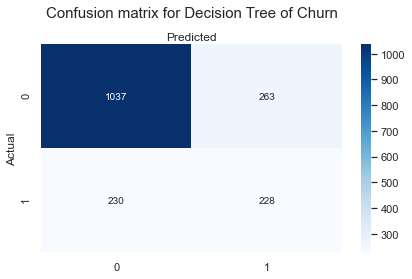

In [41]:
cnf_matrix_tree = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix_tree)

class_names = [0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_tree), annot=True, cmap=plt.cm.Blues,fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix for Decision Tree of Churn', y=1.1, fontsize=15)
plt.ylabel('Actual')
plt.xlabel('Predicted');
plt.tight_layout()
plt.show()

In [42]:
TPR_tree = round(228/(228+263), 4)
TNR_tree = round(1037/(1037+230), 4)
FPR_tree = round(263/(263+228), 4)
FNR_tree = round(230/(1037+230), 4)

cnf_matrix_tree_list = [TPR_tree, TNR_tree, FPR_tree, FNR_tree]

print('True Positive Rate =', TPR_tree)
print('True Negative Rate =', TNR_tree)
print('False Positive Rate =', FPR_tree)
print('False Negative Rate =', FNR_tree)



True Positive Rate = 0.4644
True Negative Rate = 0.8185
False Positive Rate = 0.5356
False Negative Rate = 0.1815


Interpreting Results
- True Positive Rate: Out of 100 customers that the model predicted will leave the Telco, ~46% did.
- True Negative Rate: Out of 100 customers that the model predicted will not leave the Telco, ~82% did not.
- False Positive Rate (i.e. Type I error): Out of 100 customers that the model predicted will leave the telco, ~54% did not.
- False Negative Rate (i.e. Type II error): Out of 100 customers that the model predicted will not leave the telco, ~18% did.


<u> Model evaluation using K-Fold Cross Validation </u>

In [43]:
X_xvalid = non_zero_ten_enc_df[col_list_nz_enc_pred].to_numpy()
y_xvalid = non_zero_ten_enc_df['churn'].to_numpy()

kf = KFold(n_splits=5)
k_list = []

k = 1
for train_index, test_index in kf.split(X):
    
    print(f'=== Run {k} ===')
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    
    X_xtrain, X_xtest = X_xvalid[train_index], X_xvalid[test_index]
    y_xtrain, y_xtest = y_xvalid[train_index], y_xvalid[test_index]
    
    full_tree = DecisionTreeClassifier(criterion='entropy', random_state=5)
    full_tree.fit(X_xtrain, y_xtrain)
    
    y_xfitted = full_tree.predict(X_xtest)
    mse = mean_squared_error(y_xtest, y_xfitted)
    mae = mean_absolute_error(y_xtest, y_xfitted)
    
    k_list.append({
        'K' : k,
        'model': full_tree,
        'MSE' : mse,
        'MAE' : mae
    })
    
    k+=1

display(k_list)

mse_list = []
mae_list = []

for fold in k_list:
    mse_list.append(fold['MSE'])
    mae_list.append(fold['MAE'])
    
mse_tree = round(np.mean(mse_list),4)
mae_tree = round(np.mean(mae_list),4)
kfold_tree = [mse_tree, mae_tree]
    
print('KFold MSE for Decision Tree is', mse_tree)
print('KFold MAE for Decision Tree is', mae_tree)


=== Run 1 ===
TRAIN: 5625 TEST: 1407
=== Run 2 ===
TRAIN: 5625 TEST: 1407
=== Run 3 ===
TRAIN: 5626 TEST: 1406
=== Run 4 ===
TRAIN: 5626 TEST: 1406
=== Run 5 ===
TRAIN: 5626 TEST: 1406


[{'K': 1,
  'model': DecisionTreeClassifier(criterion='entropy', random_state=5),
  'MSE': 0.27789623312011374,
  'MAE': 0.27789623312011374},
 {'K': 2,
  'model': DecisionTreeClassifier(criterion='entropy', random_state=5),
  'MSE': 0.27149964463397297,
  'MAE': 0.27149964463397297},
 {'K': 3,
  'model': DecisionTreeClassifier(criterion='entropy', random_state=5),
  'MSE': 0.2844950213371266,
  'MAE': 0.2844950213371266},
 {'K': 4,
  'model': DecisionTreeClassifier(criterion='entropy', random_state=5),
  'MSE': 0.2937411095305832,
  'MAE': 0.2937411095305832},
 {'K': 5,
  'model': DecisionTreeClassifier(criterion='entropy', random_state=5),
  'MSE': 0.2631578947368421,
  'MAE': 0.2631578947368421}]

KFold MSE for Decision Tree is 0.2782
KFold MAE for Decision Tree is 0.2782


Interpreting Results

- MSE for Decision Tree = 0.2782
- MAE for Decision Tree = 0.2782

<u> Assessing the relative importance of input features to the predictive model using feature importance</u>

In [44]:
#print(full_tree_results.feature_importances_)

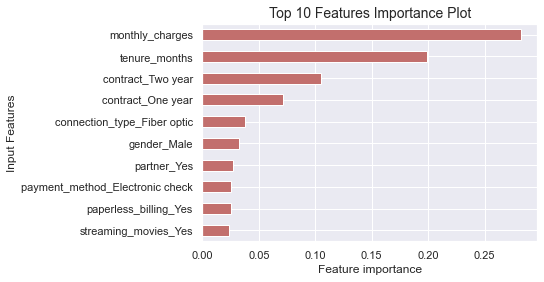

83.0 % contributed by top 10 features


In [45]:
feat_df = pd.DataFrame({'labels':col_list_nz_enc_pred, 'values':full_tree_results.feature_importances_}).sort_values(by = ['values'], ascending = True).tail(10)


feat_df.plot(kind='barh', x='labels', y='values', legend=None)
plt.title("Top 10 Features Importance Plot", fontsize=14)
plt.xlabel("Feature importance")
plt.ylabel("Input Features")

plt.show()

print(round(sum(feat_df["values"].tail(10))*100, 1), "% contributed by top 10 features")

#### 5. Comparison of Performance

<u> Comparing Accuracy Scores </u>

Both models have a relatively good accuracy score of above 70%, with the accuracy score of Logistic Regression coming in higher, at 79.5%; However, the predictive accuracy has been highly contributed by the prediction of 'no' response to churn variable as the dataset has a higher concentration of 'no' response to the 'churn' response variable. This suggests that both models have a bias tendency to over-predict no churn. As such, we need to look at alternative measures in evaluating which model is better able to predict the dataset.



In [46]:
pd.DataFrame(data=[acc_score_logr, acc_score_tree], index=['Logistic Regression', 'Decision Tree'], columns=['Accuracy Score'])

,Accuracy Score
Logistic Regression,0.7958
Decision Tree,0.7196


<u> Comparing Results of Confusion Matrix </u>

Evaluating consequences of False Positive and False Negative:
- False Positive: Opportunity costs in channeling costs and other resources in an effort to retain a customer whom the model predicted will leave the telco but actually did not (e.g. providing discounts and other perks). These can be spent on campaigning efforts to woo new customers, upgrade existing infrastructure to improve service quality and reliability.
- False Negative: Drop in subscription base, which has an immediate and direct impact on both the top and bottom lines of Telco X's financials. Holding all other factors constant, the potential consequence of a Type II error may be more far-reaching than that of Type I.

In our view, a False Negative in Telco X's context will be more consequential than a False Positive. Opportunity costs arising from False Positive can be managed through recurring and timely retrospective reviews of campaigns/events/promotions pushed out to retain existing customers. It is easier to retain an existing customer than to woo a new one. In this sense, <b>Logistic Regression Model</b> will be the better performing model due to the lower False Negative Rate.


In [47]:
pd.DataFrame(data=[cnf_matrix_logr_list, cnf_matrix_tree_list], index=['Logistic Regression', 'Decision Tree'], columns=['TPR', 'TNR', 'FPR', 'FNR'])

,TPR,TNR,FPR,FNR
Logistic Regression,0.6299,0.8417,0.3701,0.1583
Decision Tree,0.4644,0.8185,0.5356,0.1815


<u> Comparing MSE and MAE </u>

As its name suggests, the mean squared error (MSE) refers to the squared difference (i.e. squared error) between forecasted value and actual value, at each data point. Mean absolute error (MAE) refers to the absolute difference between forecasted value and actual value, at each data point. It does not consider the direction of error (positive or negative signs).

Both MSE and MAE are used as measures for comparison amongst various models, and it focuses on the <u>error rate</u> of the model. In this sense, the lower the value of MSE and MAE, the better the model is for prediction.

Comparing MSE and MAE scores for both models, we can clearly tell that the <b>Logistic Regression Model</b> is a better model for predicting churn.


In [48]:
pd.DataFrame(data=[kfold_logr, kfold_tree], index=['Logistic Regression', 'Decision Tree'], columns=['MSE', 'MAE'])

,MSE,MAE
Logistic Regression,0.1984,0.1984
Decision Tree,0.2782,0.2782


<u>Conclusion </u>

Based on the 3 performance measures presented above, the <b>Logistic Regression Model</b> is clearly a more superior model in predicting churn, as compared to the Decision Tree Model.

Using the underlying dataset provided by Telco X, the Logistic Regression Model is able to achieve an accuracy rate of 79.5%, but is better at predicting a 'no' response to churn (84.2%) than a 'yes' response to churn (63.0%), largely due to the nature of dataset. In the underlying dataset used to build the model, ~73% of samples had the 'no' response to churn, whereas 27% of samples had a 'yes' response to churn. The underlying dataset is skewed towards 'no' response to churn, which could have affected the prediction accuracy for True Positive Rate. To combat this problem, a dataset where the counts of response variable is more evenly distributed between the 'yes' and 'no' can potentially help in improving the prediction accuracy for a 'yes' response to churn.



`Grading`: 

<table>
    <tr>
        <th>Section</th><th>Your Score</th><th>Max Score</th>
    </tr>
    <tr>
        <td>Problem</td><td>2</td><td>2</td>
    </tr>
    <tr>
        <td>Data Prep</td><td>2</td><td>2</td>
    </tr>
    <tr>
        <td>Methodology</td><td>3</td><td>3</td>
    </tr>
    <tr>
        <td>Insights</td><td>3</td><td>3</td>
    </tr>
    <tr>
        <th>Total</th><th>10</th><th>10</th>
    </tr>
</table>

* Well analysed data and well thought insights. 
* Good use of kfold cross val. 
* A possible further investigation: why decision tree didn't perform as well compared to regressin? Could it be due to the mostly binary nature of the dataset? If so, how did this play a part? 

| Attribute | Description |
| :- | :- |
| customerID | A unique ID that identifies each customer. |

|Column | Description | Comments |
| :- | :- | :- |
| App |	Application name |	Potential key to merge the review dataset with the app dataset |